# Assignment Ch. 5 - Computer Vision [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence Track`
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PREREQUISITE` All modules (with their suitable versions) are installed properly.
<br>`TASK` Complete the notebook cell's code marked with <b>#TODO</b> comment.
<br>`TARGET PORTFOLIO` Students are able to replicate the image enhancement algorithm commonly (and recently) used in smartphone companies.
<br>`WARNING` Do **NOT CHANGE** any codes within the User-defined Functions (UDFs) section.

### Case Study Description
As of July 2023, both Apple and Samsung lead the smartphone industry worldwide, with a combined 52.61% of the total market share [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). As the main feature that must be present on today's smartphones, Apple and Samsung are competing to create camera technology so you can capture your best photo even in the low light condition.
- In September 2019, Apple introduced **Deep Fusion** technology (via the iPhone 11 series) to tackle the challenge. Its upgrade, named **Photonic Engine**, was introduced in September 2022 via the new iPhone 14 series [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- In February 2023, Samsung introduced **Adaptive Tetra-squared Pixel Sensor** technology with the Samsung S23 series as a counter-solution to a similar problem, promising excellent bright photo results from dark-toned images [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

At its core, both technologies work by combining several adjacent pixels into a single pixel, using a **Max Pooling** operation. In this case, you are challenged to replicate the concept (brighten dark-toned photos), and then compare the result with another approach, i.e., **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

[KLIK UNTUK TERJEMAHKAN TEKS](https://translate.google.com/?hl=id&ie=UTF-8&sl=en&tl=id&text=As%20of%20July%202023%2C%20both%20Apple%20and%20Samsung%20lead%20the%20smartphone%20industry%20worldwide%2C%20with%20a%20combined%2052.61%25%20of%20the%20total%20market%20share%20(ref1).%20As%20the%20main%20feature%20that%20must%20be%20present%20on%20today%27s%20smartphones%2C%20Apple%20and%20Samsung%20are%20competing%20to%20create%20camera%20technology%20so%20you%20can%20capture%20your%20best%20photo%20even%20in%20the%20low%20light%20condition.%0A%0A-%20In%20September%202019%2C%20Apple%20introduced%20Deep%20Fusion%20technology%20(via%20the%20iPhone%2011%20series)%20to%20tackle%20the%20challenge.%20Its%20upgrade%2C%20named%20Photonic%20Engine%2C%20was%20introduced%20in%20September%202022%20via%20the%20new%20iPhone%2014%20series%20(ref2).%0A%0A-%20In%20February%202023%2C%20Samsung%20introduced%20Adaptive%20Tetra-squared%20Pixel%20Sensor%20technology%20with%20the%20Samsung%20S23%20series%20as%20a%20counter-solution%20to%20a%20similar%20problem%2C%20promising%20excellent%20bright%20photo%20results%20from%20dark-toned%20images%20(ref3).%0A%0AAt%20its%20core%2C%20both%20technologies%20work%20by%20combining%20several%20adjacent%20pixels%20into%20a%20single%20pixel%2C%20using%20a%20Max%20Pooling%20operation.%20In%20this%20case%2C%20you%20are%20challenged%20to%20replicate%20the%20concept%20(brighten%20dark-toned%20photos)%2C%20and%20then%20compare%20the%20result%20with%20another%20approach%2C%20i.e.%2C%20Contrast%20Limited%20Adaptive%20Histogram%20Equation%20(CLAHE).&op=translate)

### Import libraries

In [ ]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

### User-defined Functions (UDFs)

In [ ]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [ ]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
Do NOT forget to upload "photo1.jpeg" and "lena.png" to the Google Collab files.

In [ ]:
img = imread("photo1.jpeg")

In [ ]:
lena = cv2.imread("lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

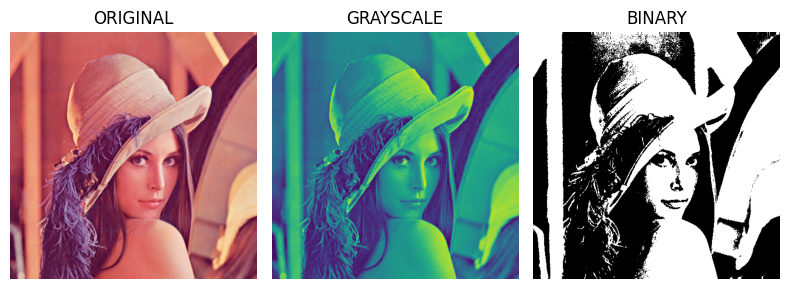

In [ ]:
# original image
img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # TODO: Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB

# color image to grayscaled image
img_grayscaled = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # TODO: Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
# img_grayscaled = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

# grayscaled image to binary image
threshold_value = 128
_, img_binary = cv2.threshold(img_grayscaled, threshold_value, 255, cv2.THRESH_BINARY) # TODO: Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY

# plot both
plot(imgs=[img_lena, img_grayscaled, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, None, "gray"])

* Check their histograms

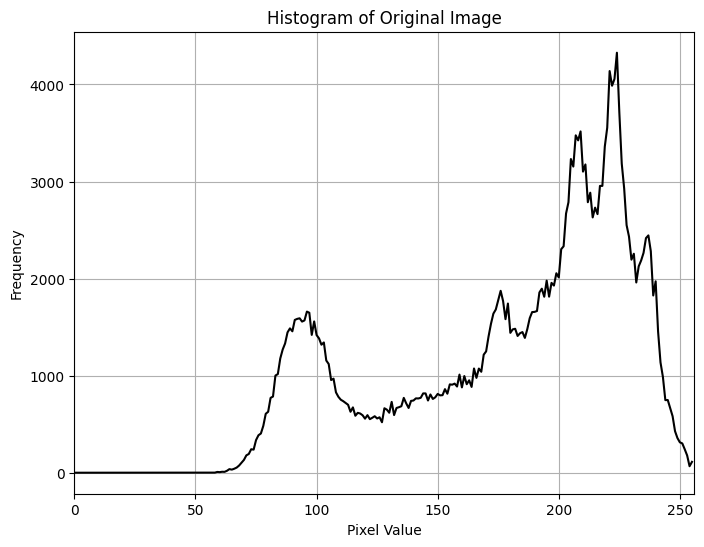

In [ ]:
# TODO: Plot the histogram from the original image
hist = cv2.calcHist([img_lena], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 6))
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist, color="black")
plt.xlim([0, 256])
plt.grid()
plt.show()

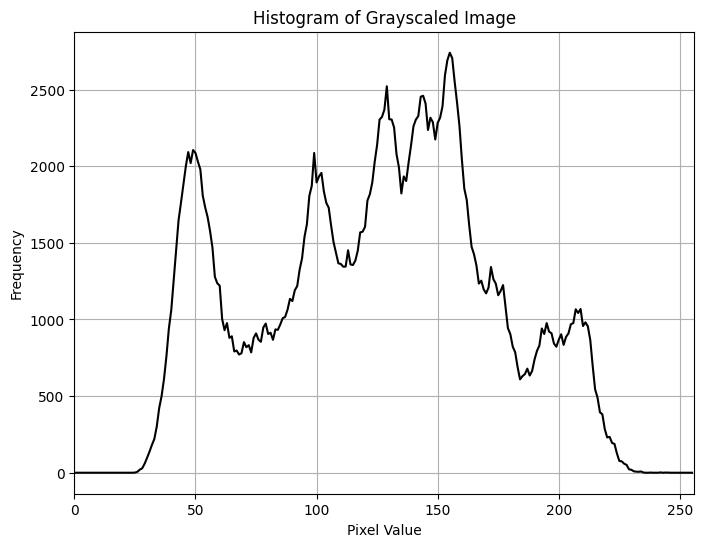

In [ ]:
# TODO: Plot the histogram from the grayscaled image
hist = cv2.calcHist([img_grayscaled], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 6))
plt.title("Histogram of Grayscaled Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist, color="black")
plt.xlim([0, 256])
plt.grid()
plt.show()

### Max Pooling (using Scikit-image)

In [ ]:
BLOCK_SIZE = (4, 4, 3)

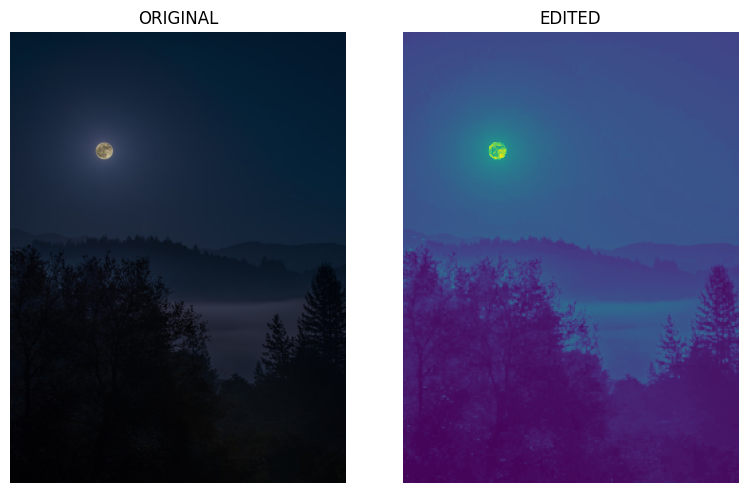

In [ ]:
img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

<ipython-input-11-c192e6f61ca2>:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_torch = from_numpy(img).permute(2, 0, 1).float()


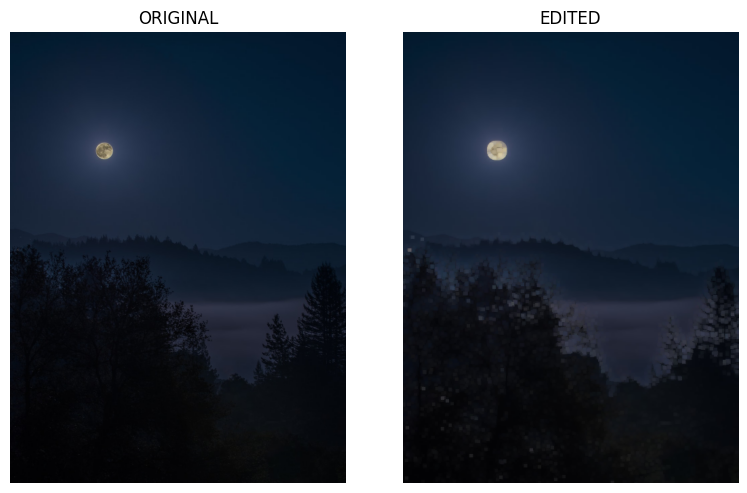

In [ ]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(img).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img, img_torch_edited])

In [ ]:
# QUESTIONS
# TODO: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?

[ ANSWER HERE ]

PyTorch menawarkan pendekatan yang lebih komprehensif dan terintegrasi terhadap Max Pooling, menjadikannya pilihan yang lebih disukai. Di sisi lain, scikit-image adalah perpustakaan berharga untuk tugas pemrosesan gambar tradisional namun kurang memiliki kemampuan dan integrasi dalam pembelajaran dalam yang PyTorch tawarkan.

### Min Pooling and Average Pooling

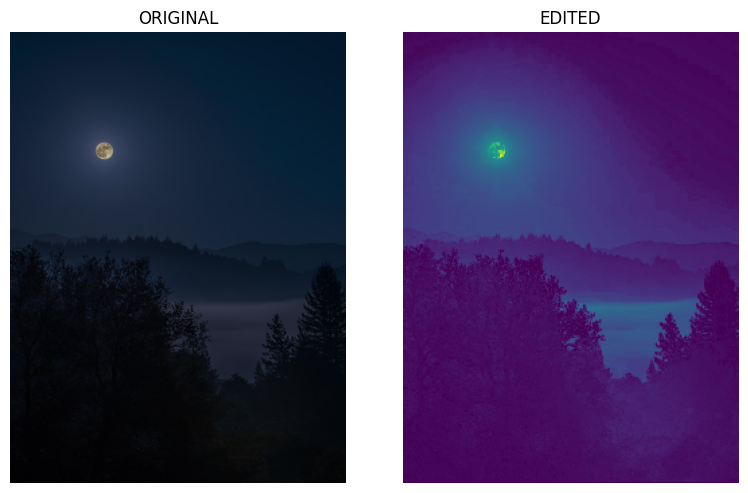

In [ ]:
img_edited_min = block_reduce(img, block_size=BLOCK_SIZE, func=np.min) # TODO: Recall the block_reduce(), but with func=np.min
plot(imgs=[img, img_edited_min])

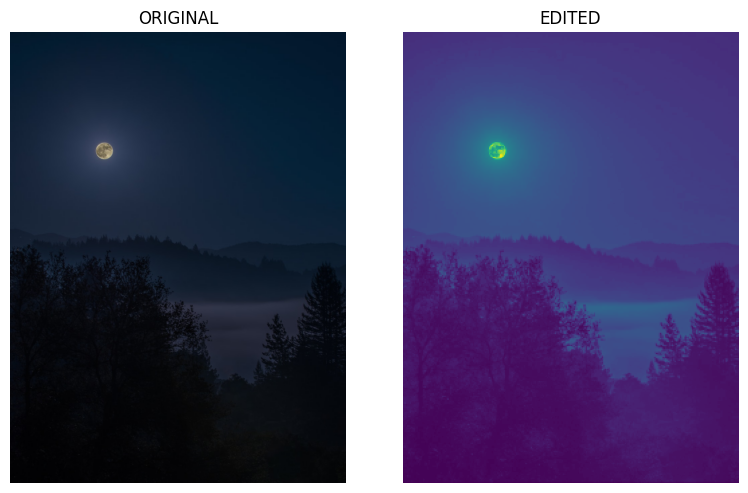

In [ ]:
img_edited_avg = block_reduce(img, block_size=BLOCK_SIZE, func=np.mean).astype(int) # TODO: Recall the block_reduce().astype(int), but with func=np.mean
plot(imgs=[img, img_edited_avg])

In [ ]:
# QUESTIONS
# TODO: What is the difference between Min Pooling and Average Pooling operations?
# If you cannot see the difference, try with another image or change the BLOCK_SIZE.

[ ANSWER HERE ]

Hasil gambar yang dihasilkan dari Min Pooling lebih gelap dibandingkan dengan Average pooling. Sehingga pada min pooling menimbulkan kesan warna lebih condong kearah ungu

### CLAHE
Now imagine you have a better approach to compete Apple's Photonic Engine and Samsung's Adaptive Tetra-squared Pixel technologies using **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. How's the result?

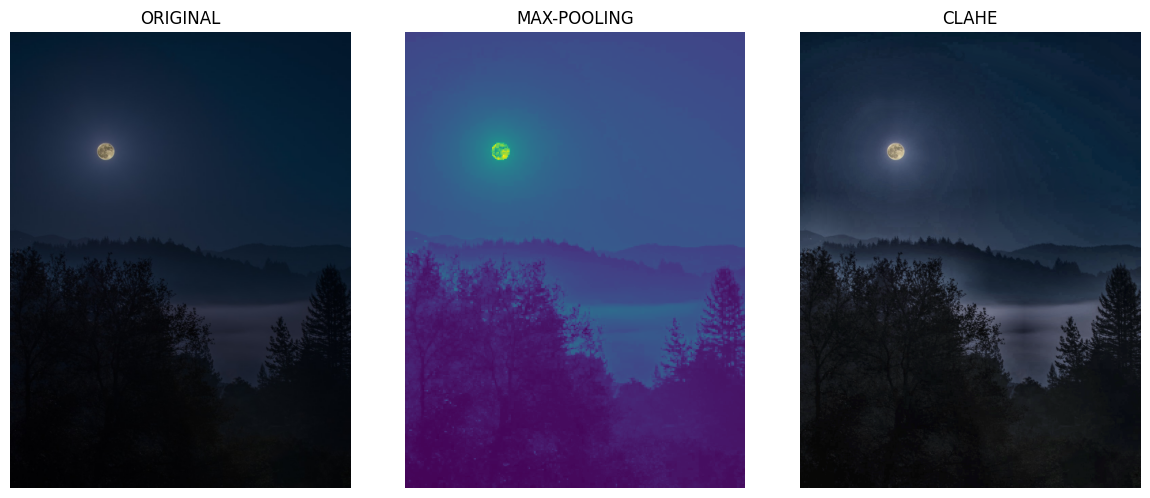

In [ ]:
img_clahe = apply_clahe_rgb(img) # TODO: Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [ ]:
# QUESTIONS
# TODO: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?

[ ANSWER HERE ]

CLAHE adalah teknik yang adaptif dan berdasarkan histogram. Ini berarti CLAHE akan mempertimbangkan kontras dan pencahayaan pada setiap bagian gambar secara terpisah, sehingga tidak hanya mencerahkan gambar secara keseluruhan seperti Max Pooling. Ini menjadikan CLAHE lebih efektif dalam mempertahankan detail yang mungkin hilang dengan Max Pooling, terutama pada gambar yang memiliki variasi kontras yang signifikan.

### Save your edited image

In [ ]:
FILE_NAME = "ResultofImgClahe.png" # TODO: Give any file name to your new CLAHE-enhanced photo, ends with .png extension
imsave(fname=FILE_NAME, arr=img_clahe)

### Scoring
Total `#TODO` = 12
<br>Checklist:

- [ ] Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB
- [ ] Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
- [ ] Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY
- [ ] Plot the histogram from the original image
- [ ] Plot the histogram from the grayscaled image
- [ ] QUESTION: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?
- [ ] Recall the block_reduce(), but with func=np.min
- [ ] Recall the block_reduce().astype(int), but with func=np.mean
- [ ] What is the difference between Min Pooling and Average Pooling operations?
- [ ] Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
- [ ] QUESTION: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?
- [ ] Give any file name to your new CLAHE-enhanced photo, ends with .png extension

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2023 Startup Campus, Indonesia
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.